In [232]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare


In [121]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [122]:
df = prepare.prep_titanic(df)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,1,0,71.2833,0,0,0,0
2,2,2,1,3,0,0,7.9250,1,0,0,1
3,3,3,1,1,1,0,53.1000,0,0,0,1
4,4,4,0,3,0,0,8.0500,1,1,0,1


In [182]:


def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 755 to 678
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               498 non-null    int64  
 1   passenger_id             498 non-null    int64  
 2   survived                 498 non-null    int64  
 3   c_level                  498 non-null    int64  
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   alone                    498 non-null    int64  
 8   sex_male                 498 non-null    uint8  
 9   embark_town_Queenstown   498 non-null    uint8  
 10  embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(7), uint8(3)
memory usage: 36.5 KB


In [143]:
train.survived.mode()

0    0
Name: survived, dtype: int64

In [144]:
train_baseline=train.survived.mode().tolist()*498
validate_baseline=train.survived.mode().tolist()*214

In [107]:


train, validate, test = train_validate_test_split(df, target='survived', seed=123)

In [151]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [152]:

model_1 = DecisionTreeClassifier( max_depth=3,random_state=123)


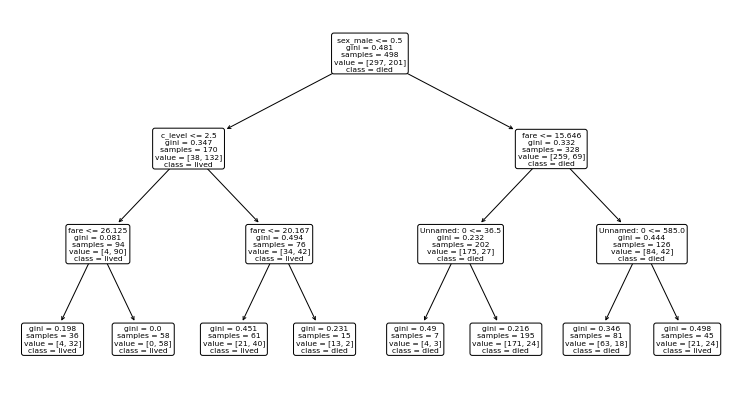

In [153]:

model_1.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(model_1, feature_names=X_train.columns.tolist(), class_names=['died','lived'], rounded=True)
plt.show()

In [154]:

y_pred = model_1.predict(X_train)
y_pred[0:5]


array([0, 0, 1, 1, 0])

In [155]:
y_pred_proba = model_1.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.87692308, 0.12307692],
       [0.77777778, 0.22222222],
       [0.46666667, 0.53333333],
       [0.3442623 , 0.6557377 ],
       [0.77777778, 0.22222222]])

In [156]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model_1.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.81


In [157]:

confusion_matrix(y_train, y_pred)


array([[251,  46],
       [ 47, 154]])

In [158]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       297
           1       0.77      0.77      0.77       201

    accuracy                           0.81       498
   macro avg       0.81      0.81      0.81       498
weighted avg       0.81      0.81      0.81       498



In [159]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(model_1.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.77


In [160]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = model_1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81       136
           1       0.68      0.69      0.68        78

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.77      0.77      0.77       214



In [161]:
#Accuracy of Decision Tree classifier on training set with depth of 3: 0.81
#Accuracy of Decision Tree classifier on validate set with depth of 3: 0.77


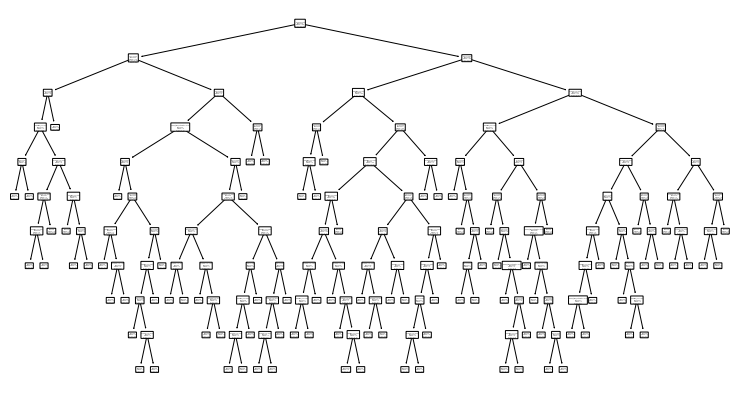

In [162]:
model_2 = DecisionTreeClassifier( max_depth=10,random_state=123)
model_2.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(model_2, feature_names=X_train.columns.tolist(), class_names=['died','lived'], rounded=True)
plt.show()

In [163]:
y_pred = model_2.predict(X_train)
y_pred[0:5]

array([1, 0, 0, 0, 0])

In [164]:
y_pred_proba = model_2.predict_proba(X_train)
y_pred_proba[0:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [165]:
print('Accuracy of Decision Tree classifier on training set with depth of 10: {:.2f}'
      .format(model_2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set with depth of 10: 0.96


In [166]:
confusion_matrix(y_train, y_pred)

array([[297,   0],
       [ 21, 180]])

In [167]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97       297
           1       1.00      0.90      0.94       201

    accuracy                           0.96       498
   macro avg       0.97      0.95      0.96       498
weighted avg       0.96      0.96      0.96       498



In [168]:
print('Accuracy of Decision Tree classifier on validate set with depth of 10: {:.2f}'
     .format(model_2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set with depth of 10: 0.81


In [169]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = model_2.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       136
           1       0.80      0.65      0.72        78

    accuracy                           0.81       214
   macro avg       0.81      0.78      0.79       214
weighted avg       0.81      0.81      0.81       214



# Accuracy of Decision Tree classifier on training set with depth of 3: 0.81
# Accuracy of Decision Tree classifier on validate set with depth of 3: 0.77


# Accuracy of Decision Tree classifier on training set with depth of 10: 0.96
# Accuracy of Decision Tree classifier on validate set with depth of 10: 0.81

In [201]:
telco = acquire.get_telco_data()
telco.head()

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [202]:
telco = prepare.prep_telco(telco)
telco=telco.drop(['customer_id'], axis=1)
telco.head()

,Unnamed: 0,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,churn_Yes,Month-to-month,One year,Two year,DSL,Fiber optic,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,9,1,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1,0,9,2,0,0,0,0,0,2,...,0,1,0,0,1,0,0,0,0,1
2,2,0,4,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,3,1,13,1,0,1,1,0,1,2,...,1,1,0,0,0,1,0,0,1,0
4,4,1,3,1,0,0,0,1,1,0,...,1,1,0,0,0,1,0,0,0,1


In [203]:
train, validate, test = train_validate_test_split(telco, target='churn_Yes', seed=123)

In [204]:
train.churn_Yes.mode()

0    0
Name: churn_Yes, dtype: uint8

In [205]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 720 to 3333
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1691 non-null   int64  
 1   senior_citizen             1691 non-null   int64  
 2   tenure                     1691 non-null   int64  
 3   multiple_lines             1691 non-null   int64  
 4   online_security            1691 non-null   int64  
 5   online_backup              1691 non-null   int64  
 6   device_protection          1691 non-null   int64  
 7   tech_support               1691 non-null   int64  
 8   streaming_tv               1691 non-null   int64  
 9   streaming_movies           1691 non-null   int64  
 10  monthly_charges            1691 non-null   float64
 11  total_charges              1691 non-null   float64
 12  gender_Male                1691 non-null   uint8  
 13  partner_Yes                1691 non-null   uin

In [206]:
validate.churn_Yes.mode()

0    0
Name: churn_Yes, dtype: uint8

In [207]:
train_baseline=train.churn_Yes.mode().tolist()*3943
validate_baseline=train.churn_Yes.mode().tolist()*1691

In [208]:
X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

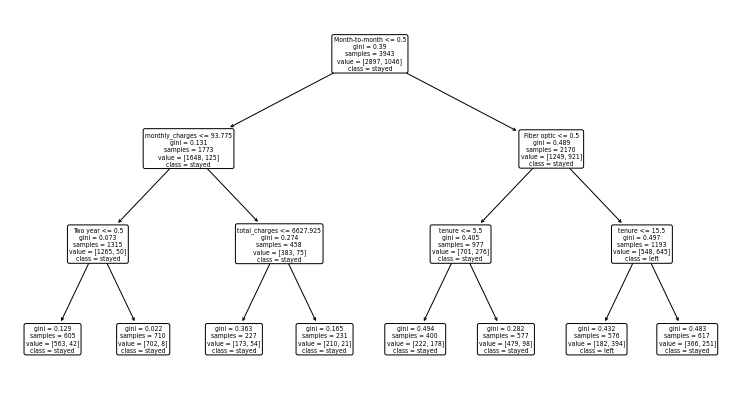

In [217]:
model_1 = DecisionTreeClassifier( max_depth=3,random_state=123)

model_1.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(model_1, feature_names=X_train.columns.tolist(), class_names=['stayed','left'], rounded=True)
plt.show()

In [210]:
y_pred = model_1.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [211]:
y_pred_proba = model_1.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.98873239, 0.01126761],
       [0.98873239, 0.01126761],
       [0.76211454, 0.23788546],
       [0.555     , 0.445     ],
       [0.83015598, 0.16984402]])

In [212]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model_1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [213]:
confusion_matrix(y_train, y_pred)


array([[2715,  182],
       [ 652,  394]])

In [214]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2897
           1       0.68      0.38      0.49      1046

    accuracy                           0.79      3943
   macro avg       0.75      0.66      0.68      3943
weighted avg       0.77      0.79      0.77      3943



In [215]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(model_1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [216]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = model_1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1242
           1       0.69      0.39      0.49       449

    accuracy                           0.79      1691
   macro avg       0.75      0.66      0.68      1691
weighted avg       0.78      0.79      0.77      1691



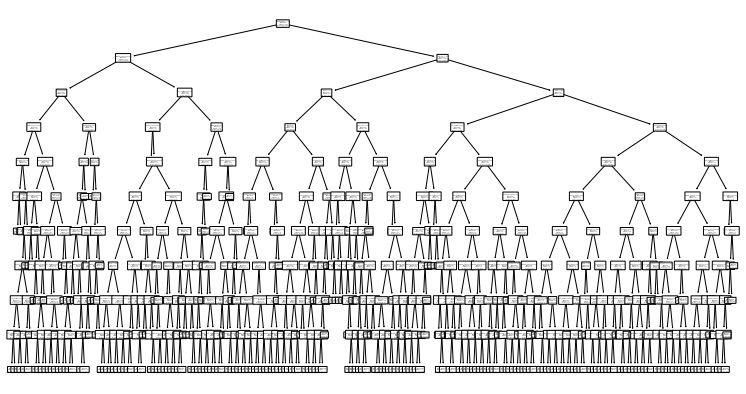

In [218]:
model_2 = DecisionTreeClassifier( max_depth=10,random_state=123)
model_2.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(model_2, feature_names=X_train.columns.tolist(), class_names=['stayed','left'], rounded=True)
plt.show()

In [219]:
y_pred = model_2.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 0], dtype=uint8)

In [220]:
y_pred_proba = model_2.predict_proba(X_train)
y_pred_proba[0:5]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.41176471, 0.58823529],
       [0.8125    , 0.1875    ]])

In [221]:
print('Accuracy of Decision Tree classifier on training set with depth of 10: {:.2f}'
      .format(model_2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set with depth of 10: 0.90


In [222]:
confusion_matrix(y_train, y_pred)

array([[2701,  196],
       [ 206,  840]])

In [223]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2897
           1       0.81      0.80      0.81      1046

    accuracy                           0.90      3943
   macro avg       0.87      0.87      0.87      3943
weighted avg       0.90      0.90      0.90      3943



In [224]:
print('Accuracy of Decision Tree classifier on validate set with depth of 10: {:.2f}'
     .format(model_2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set with depth of 10: 0.76


In [225]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = model_2.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1242
           1       0.54      0.54      0.54       449

    accuracy                           0.76      1691
   macro avg       0.69      0.69      0.69      1691
weighted avg       0.76      0.76      0.76      1691



# Accuracy of Decision Tree classifier on training set: 0.79
# Accuracy of Decision Tree classifier on validate set: 0.79


# Accuracy of Decision Tree classifier on training set with depth of 10: 0.90
# Accuracy of Decision Tree classifier on validate set with depth of 10: 0.76


In [227]:
boat=acquire.get_titanic_data()

In [228]:
boat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [229]:
boat=prepare.prep_titanic(boat)
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               891 non-null    int64  
 1   passenger_id             891 non-null    int64  
 2   survived                 891 non-null    int64  
 3   pclass                   891 non-null    int64  
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(7), uint8(3)
memory usage: 58.4 KB


In [230]:
train, validate, test = train_validate_test_split(boat, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [233]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [234]:
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [235]:
print(rf.feature_importances_)


[0.04552854 0.03715858 0.14357771 0.05203138 0.02403976 0.15786825
 0.02120436 0.48807413 0.01206356 0.01845373]


In [236]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.83


In [237]:
print(confusion_matrix(y_train, y_pred))


[[290  17]
 [ 70 121]]


In [238]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       307
           1       0.88      0.63      0.74       191

    accuracy                           0.83       498
   macro avg       0.84      0.79      0.80       498
weighted avg       0.83      0.83      0.82       498



In [239]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


Accuracy of random forest classifier on test set: 0.79
